<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Introduction](#1)
2. [Changelog](#2)
3. [Business Understanding](#3)
4. [Data Understanding](#4)
5. [Data Preperation](#5)
6. [Modeling](#6)
7. [Evaluation](#7)
8. [Improvements](#8)
9. [Conclusion](#9)

# **1. Introduction** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

This notebook will explore Support Vector Machine by going through the CRISP-DM process. The goal is to gain insight of how to use SVM in Python and their usefulness. This notebook will be borrowing from Anand Prabhakar's notebook [Python-Support-vector-machines](https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/05_svm.ipynb) on the same topic. I highly recommend you read his notebook.

# **2. Changelog** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Below is the changelog of the modifications made to the [Python-Support-vector-machines](https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/05_svm.ipynb) in Python notebook:

- Changed "cross_validation" to "model_selection" in import from sklearn
- Located and downloaded [dataset](https://www.kaggle.com/datasets/sam1o1/cell-samplescsv?select=cell_samples.csv) from kaggle
- Modify code to retrieve dataset
- Selected a different dataset for my own notebook
- Went through business and data understanding, and data preparation similar to the Bayesian notebook, and independent of the SVM notebook
- Used the same training method as the SVM notebook, but changed the training/testing sets from 20% to 30%
- Used the same evaluation as Bayesian notebook
- Added an improvements section where the model is re-trained
- Added conclusion

# **3. Business Understanding** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

The dataset I will be using for this notebook is the [Apple Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality). Each record represents an apple with its quality labeled as good or bad.

For each apple, there are the following labels:
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit

For our purposes, we likely want to pick two of these labels to train our model on, as SVMs tends to work best with 2 dimensional data. Since our goal is to categorize the apples as good or bad quality, it is likely that ripeness will be a good label to make this prediction. However we may want to experiment with the other labels to determine which one is best to train the model.

# **4. Data Understanding** <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

We will now explore our dataset to understand what type of data we are working with. First, we must import our dataset into python.

In [1]:
# This library will help us access our file
try:
    import os
except:
    !pip install os
    import os
    
# This library is for data processing, and CSV file I/O
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

In [2]:
current_working_directory = os.getcwd()
file = r'\input\apple_quality.csv' #this directory may differ for you
data = current_working_directory + file

df = pd.read_csv(data, header=0,sep=',')

Now that we've imported our data, we can explore it to gain insights

In [3]:
df.shape

(4001, 9)

This tells us that there are 4001 instance, and 17 attributes in our dataset.

In [4]:
df.head() #preview the top 5 rows

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [5]:
df.info() #summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


From the summary, we can see there are missing values. However, there's a single missing value for each label except for one. If were lucky, this will be a single record we can ommit from the dataset. We will explore this further during our data preperation stage.

### Explore Categorical Variables

In [6]:
# identify categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')
print(f'The categorical variables are: {categorical}')

There are 2 categorical variables

The categorical variables are: ['Acidity', 'Quality']


However, all of our labels with the exception of quality should be numerical values. Looking at the summary of the data we can see the acidity is of type object. We'll need to convert the data to a numerical value during data preperation.

### Explore Numerical Variables

In [7]:
# identify numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print(f'There are {len(numerical)} numerical variables\n')
print(f'The numerical variables are: {numerical}')

There are 7 numerical variables

The numerical variables are: ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']


# **5. Data Preperation** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

During Data Understanding, we noticed there are some missing variables. There is also one label of type object that should be numerical. In this section we will handle for missing data, remove unecessary labels, as well as converting data types to the correct type.

In [8]:
df[numerical].isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
dtype: int64

Here we can see there are null values for each category. Next we will remove all null values and check again.

In [9]:
df.dropna(inplace=True) # remove all null values from the dataframe
df[numerical].isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
dtype: int64

Next we will drop the `A_id` column as it's not needed for our purposes.

In [10]:
df.drop('A_id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


Next, I will change the datatype of the Acidity label from object to float64

In [11]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce', downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float32
 7   Quality      4000 non-null   object 
dtypes: float32(1), float64(6), object(1)
memory usage: 265.6+ KB


Now that we've converted the Acidity label to a float, we want to reassign our numerical and categorical variables

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')
print(f'The categorical variables are: {categorical}\n\n')

print(f'There are {len(numerical)} numerical variables\n')
print(f'The numerical variables are: {numerical}')

There are 1 categorical variables

The categorical variables are: ['Quality']


There are 7 numerical variables

The numerical variables are: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


Next, we're goin to plot our apples and try different label combinations to see if we can find one that cleanly separates our good apples from our bad apples.

In [13]:
%matplotlib inline 

# This library is for plotting our data in a chart
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

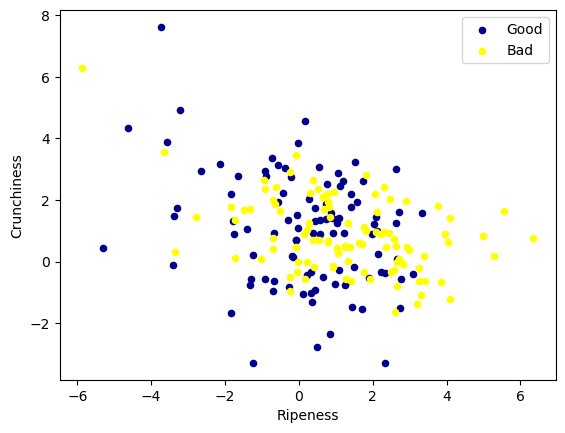

In [14]:
x_axis = 'Ripeness'
y_axis = 'Crunchiness'

ax = df[df['Quality'] == 'good'][0:100].plot(kind='scatter', x=x_axis, y=y_axis, color='DarkBlue', label='Good');
df[df['Quality'] == 'bad'][0:100].plot(kind='scatter', x=x_axis, y=y_axis, color='Yellow', label='Bad', ax=ax);
plt.show()

From the chart above, we can tell that the good and bad apples are not cleanly separated. In fact, even looking at just the `Ripeness`, it does not seem to be a good indicator of whether an apple is good or bad as we initially assumed. Next we will try different combinations of labels to see if we can find one that separates our data cleanly enough for the SVM.

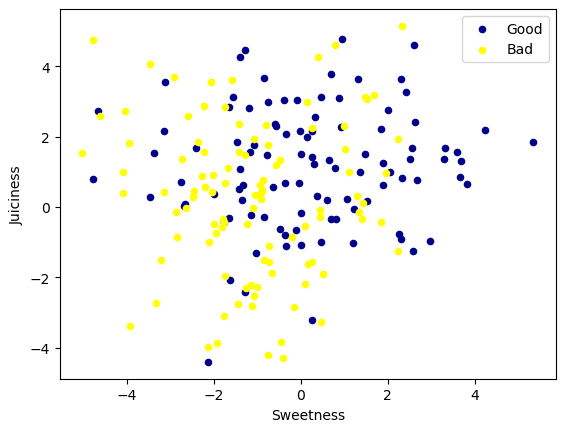

In [15]:
x_axis = 'Sweetness'
y_axis = 'Juiciness'

ax = df[df['Quality'] == 'good'][0:100].plot(kind='scatter', x=x_axis, y=y_axis, color='DarkBlue', label='Good');
df[df['Quality'] == 'bad'][0:100].plot(kind='scatter', x=x_axis, y=y_axis, color='Yellow', label='Bad', ax=ax);
plt.show()

`Sweetness` vs `Juiciness` seems like an improvement for our purposes. However, it's likely that if we wanted further seperation between the classes, we'd need to add a dimension, which would map the data to a higher dimension. To start, we will proceed with just two labels and see what results we can get.

In [16]:
try:
    from sklearn.model_selection import train_test_split
except:
    !pip install sklearn
    from sklearn.model_selection import train_test_split
    
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

feature_df = df[['Sweetness', 'Juiciness']]
X = np.asarray(feature_df)
y = np.asarray(df['Quality'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2800, 2) (2800,)
Test set: (1200, 2) (1200,)


# **6. Modeling** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

Now that we've selected our labels, we can proceed with training the model.

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

#### from Anand Prabhakar [Python-Support-vector-machines](https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/05_svm.ipynb)

In [17]:
# This library is for training a SVM model
try:
    from sklearn import svm
except:
    !pip install sklearn
    from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [18]:
y_pred = clf.predict(X_test)
y_pred

array(['bad', 'good', 'good', ..., 'good', 'bad', 'good'], dtype=object)

# **7. Evaluation** <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Now that we've trained our model and made a prediction, we can check its accuracy against the training set accuracy.

In [19]:
try:
    from sklearn.metrics import accuracy_score
except:
    !pip install sklearn
    from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(X_train)
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.6433
Training-set accuracy score: 0.6725


We have a difference of about 3% between our training and test sets, which may be indicative of some minor overfitting. Due to our large dataset, this is likely due to the low amounts of labels used for the prediction. During our improvements stage, we can try increasing the complexity of the model and see how this impacts our results.

We can further evaluate our model by comaring its accuracy to the **null accuracy**.

In [20]:
# return the most frequent value
most_frequent = (y_test == "good").sum() if (y_test == "bad").sum() >= (y_test == "Yes").sum() else (y_test == "Yes").sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.4850


Our model accuracy is higher than the null accuracy, so our model is doing a relatively good job classifying the labels for this dataset.

### Confusion matrix

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

In [21]:
# Print the Confusion Matrix and slice it into four pieces

try:
    from sklearn.metrics import confusion_matrix
except:
    !pip install sklearn
    from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[396 222]
 [206 376]]

True Positives(TP) =  396

True Negatives(TN) =  376

False Positives(FP) =  222

False Negatives(FN) =  206


The confusion matrix shows `396 + 376 = 772 correct predictions` and `222 + 206 = 428 incorrect predictions`. Next we will visualize this graphically.

              precision    recall  f1-score   support

         bad       0.66      0.64      0.65       618
        good       0.63      0.65      0.64       582

    accuracy                           0.64      1200
   macro avg       0.64      0.64      0.64      1200
weighted avg       0.64      0.64      0.64      1200



<Axes: >

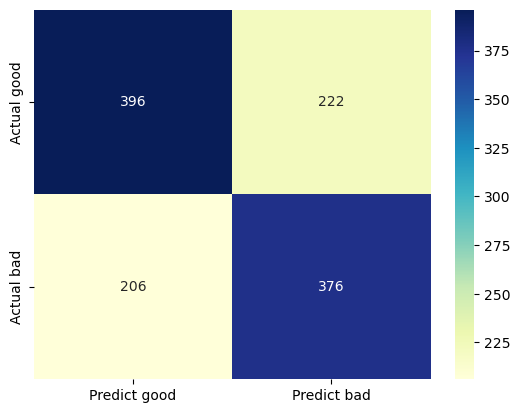

In [22]:
# visualize confusion matrix with seaborn heatmap

try:
    import seaborn as sns # for statistical data visualization
except:
    !pip install seaborn
    import seaborn as sns # for statistical data visualization

try:
    from sklearn.metrics import classification_report
except:
    !pip install sklearn
    from sklearn.metrics import classification_report



cm_matrix = pd.DataFrame(data=cm, columns=['Predict good', 'Predict bad'], 
                                 index=['Actual good', 'Actual bad'])

print(classification_report(y_test, y_pred))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [23]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.6433
Precision : 0.6408
Recall: 0.6578
Specificity : 0.6288
NPV: 0.6460
F1 Score: 0.6492
Balanced Accuracy: 0.6433


# **8. Improvements** <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

Now that we've trained our model, we can see that our accuracy is relatively low at `64%`. Ideally we'd want our accuracy to be above `80%`. Looking at our chart from before, this is likely because two labels is not enough to properly classify our apples between good and bad. To improve the model, we can try adding additional dimensions. This will add complexity to the model, but hopefully it will improve our accuracy to an acceptable range. In this step, we will re-train our model, but we will include all of the labels to start and see how the model changes.

In [24]:
# get our data
current_working_directory = os.getcwd()
file = r'\input\apple_quality.csv' #this directory may differ for you
data = current_working_directory + file

df = pd.read_csv(data, header=0,sep=',')

# data pre-processing
df.dropna(inplace=True) # remove all null values from the dataframe
df.drop('A_id', axis=1, inplace=True) # get rid of id column
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce', downcast='float') # convert acidity from object to float

# identify numerical and categorical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

# get our training and testing sets
feature_df = df[numerical] # here we are using all of the labels to train the model
X = np.asarray(feature_df)
y = np.asarray(df['Quality'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

# train the model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Now we will evaluate the new model and compare our results to the previous model.

Model accuracy score: 0.8633
Training-set accuracy score: 0.9032
Null accuracy score: 0.4850


Confusion matrix

 [[523  95]
 [ 69 513]]

True Positives(TP) =  523

True Negatives(TN) =  513

False Positives(FP) =  95

False Negatives(FN) =  69
              precision    recall  f1-score   support

         bad       0.88      0.85      0.86       618
        good       0.84      0.88      0.86       582

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



<Axes: >

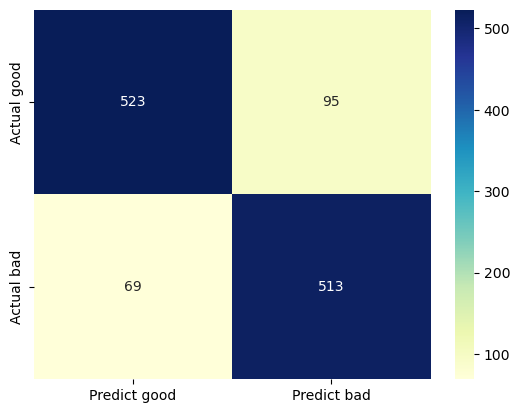

In [26]:
y_pred_train = clf.predict(X_train)
    
# return the most frequent value
most_frequent = (y_test == "good").sum() if (y_test == "bad").sum() >= (y_test == "Yes").sum() else (y_test == "Yes").sum()
null_accuracy = most_frequent/len(y_test)

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Predict good', 'Predict bad'], 
                                 index=['Actual good', 'Actual bad'])




print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

print('\n\nConfusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

print(classification_report(y_test, y_pred))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.8633
Precision : 0.8463
Recall: 0.8834
Specificity : 0.8438
NPV: 0.8814
F1 Score: 0.8645
Balanced Accuracy: 0.8636


Immediately we can see an improvement in our model. Our accuracy has increased from 64% to 86%, putting it within acceptable range. However, the gap between the training set and testing set is about 4%, slightly higher than our last model, which is indicative of minor overfitting. Our next step to improve this would be to try ommiting some of the labels to see if we can improve the model further and reduce the overfitting. However, as it is now, the model is much improved from our previous one.

# **9. Conclusion** <a class="anchor" id="9"></a>
[Table of Contents](#0.1)

Looking back on what we've acheived in this notebook, we've successfully gone through the phases of CRISP-DM to generate a machine learning model that can accurately predict the quality of apples.
1. `Business Understanding`: This phase helped us understand what our data represents so we could make better understand how to train our model to make predictions.
2. `Data Understanding`: This phase showed us what type of data we were working with, and how to organize it to train our model.
3. `Data Preperation`: This step allowed us to remove null values and prepare our data for modeling.
4. `Modeling`: In this step we were able to use our training set to train the model, and validate it using the testing set.
5. `Evaluation`: In this step, we were able to use a confusion matrix and ev.
6. `Improvements`: After identifying an overfitting issue, we were able to revisit our business understanding to improve the model by removing labels that were unlikely to have a big impact on the predictivity of the model, and show an improvement by performing an evaluation on the new model.